In [175]:
#import the common packages required for initial analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [176]:
# load the data into data frame and check the few headings

df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### DATA CLEANUP

<Axes: >

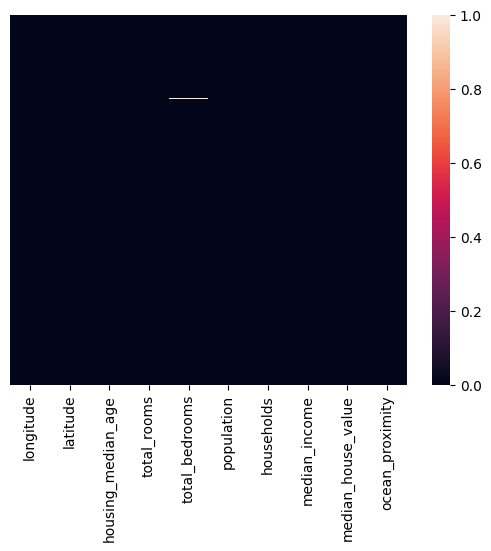

In [177]:
sns.heatmap(df.isnull(),yticklabels=False)

In [178]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Total bedroom data ha 207 Nan value. We can make it as 0 or drop the value. Since bedroom is one of the key columns we will make the missing value as 0 

In [179]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [181]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [182]:
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

## Exploratory data analysis

Text(0.5, 1.0, 'houisng age distribution from the data set')

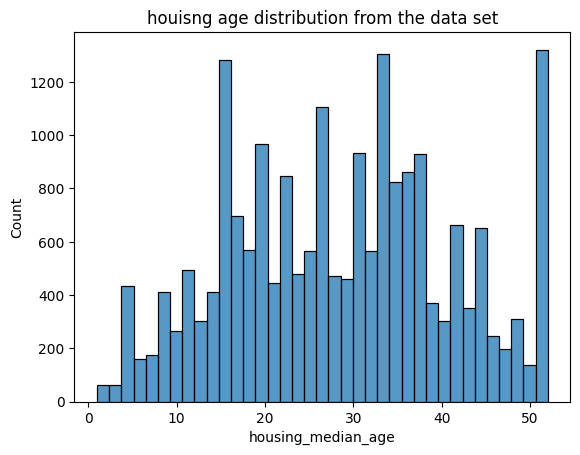

In [183]:
sns.histplot(data=df,x="housing_median_age")
plt.title("houisng age distribution from the data set")

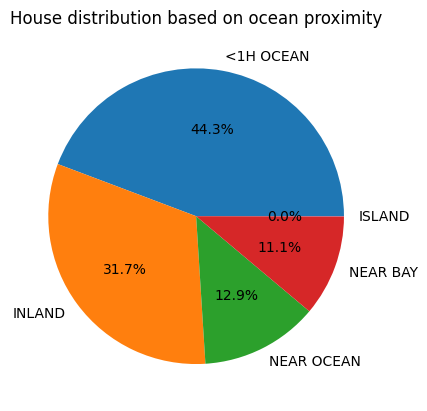

In [184]:
ocean  = df['ocean_proximity'].value_counts().reset_index(name='count')
plt.pie(x=ocean['count'],labels=ocean['ocean_proximity'],autopct='%1.1f%%')
plt.title("House distribution based on ocean proximity")
plt.show()

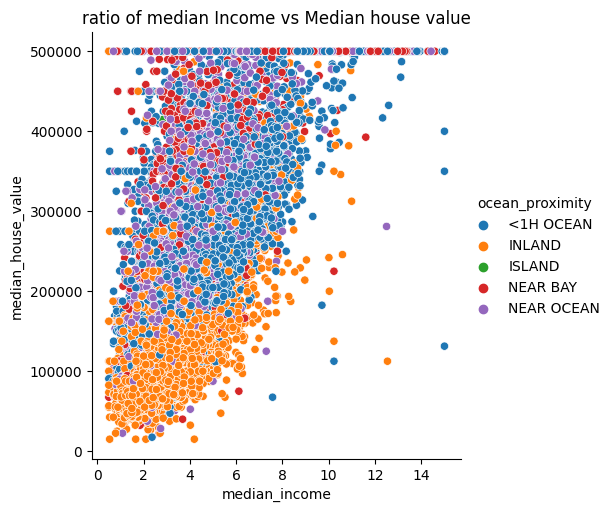

In [185]:
sns.relplot(data=df,x="median_income",y="median_house_value",kind='scatter',hue='ocean_proximity')
plt.title("ratio of median Income vs Median house value")
plt.show()

## From the graph we could see it is forming a cluster 
### houe is inland has less median income and less house value 
### house near bay is having the high house value

In [186]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

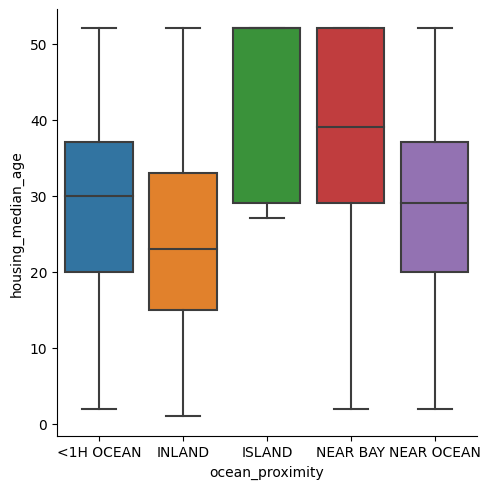

In [187]:
g= sns.catplot(data=df,x="ocean_proximity",y="housing_median_age",kind='box')


In [188]:
filt = df['ocean_proximity'] == 'ISLAND'
ISLAND = df[filt]['housing_median_age'].min()
print(ISLAND)

27.0


### From the Box plot we could see the houses in ISLAND has old houses compared to other categories

The Minimum house age available at ISLAND is 27 years

## Prepare the data for modelling 

In [197]:
data = pd.get_dummies(df)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [190]:
data = data.drop(["longitude","latitude"],axis=1)

X = data.drop(["median_house_value"],axis=1).values
y = data['median_house_value'].values




In [191]:
lis_of_features = data.columns.to_list()
lis_of_features.remove("median_house_value")

### Start with intial model Linear Regression

In [192]:
#import DicisionTree regressior
from sklearn.tree import DecisionTreeRegressor

#import train test split
from sklearn.model_selection import train_test_split

#import mean square error
from sklearn.metrics import mean_squared_error as MSE 

#split the data into 80% train and 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.4)


#Intantiate the dt
dt = DecisionTreeRegressor(max_depth=20,min_samples_leaf=0.1,random_state=42)

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

mse_dt = MSE(y_test,y_pred)

rmse_dt = mse_dt**(1/2)

print(f"Mean square value of Dt model is : {mse_dt}")
print(f"Root Means Square value of Dt model is : {rmse_dt}")


Mean square value of Dt model is : 6566574076.892849
Root Means Square value of Dt model is : 81034.40057711817


In [193]:
#import DicisionTree regressior
from sklearn.linear_model import LinearRegression

#import train test split
from sklearn.model_selection import train_test_split

#import mean square error
from sklearn.metrics import mean_squared_error as MSE 

#split the data into 80% train and 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.4)


#Intantiate the dt
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mse_dt = MSE(y_test,y_pred)

rmse_dt = mse_dt**(1/2)

print(f"Mean square value of Dt model is : {mse_dt}")
print(f"Root Means Square value of Dt model is : {rmse_dt}")


Mean square value of Dt model is : 5020968375.325839
Root Means Square value of Dt model is : 70858.79179978896


In [194]:
#standard imports

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE 

#set seed for reproducability
SEED = 2023

#split the train and test data into 70% train and 30% test

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=SEED,test_size=0.3)

rf = RandomForestRegressor(n_estimators=400,n_jobs=-1,min_samples_leaf=0.12,random_state=SEED)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

#Evaluate the RMSE

rmse = (MSE(y_test,y_pred))**(1/2)

print(f"Root mean square score is : {rmse}")

Root mean square score is : 83371.78879144842


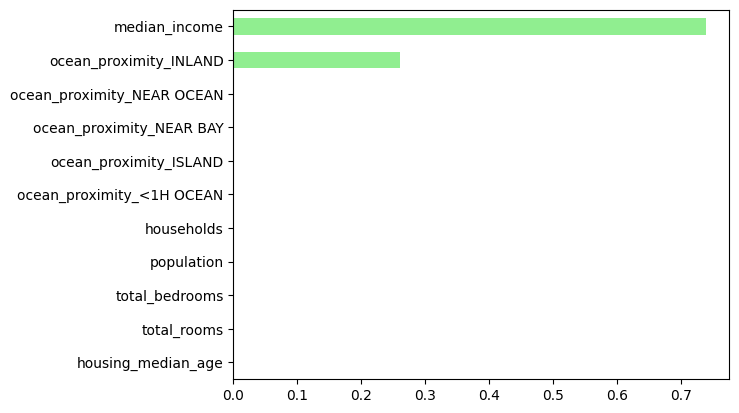

In [195]:
#Create a pd sereies of feature importance 
importance_rf = pd.Series(rf.feature_importances_,index= lis_of_features)

#sort importance_rf
sorted_importance = importance_rf.sort_values()

#make a horizontal bar plot
sorted_importance.plot(kind='barh',color='lightgreen')
plt.show()



## Stochastic Gradient Boosting

In [196]:
#import models for utility function
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#set seed for reproducability
SEED = 2024

#split the train and test data into 70% train and 30% test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=SEED,test_size=0.3)

#instantitate the Gradient boosting regressor
gb = GradientBoostingRegressor(n_estimators=300,max_depth=1,random_state=SEED,subsample=0.8,max_features=0.2)

#fit gb to the traininng set
gb.fit(X_train,y_train)

#predict the result and store it in y_pred
y_pred = gb.predict(X_test)

#evaludation
mse_score = MSE(y_test,y_pred)
rmse = mse_score**(1/2)

print(f"The Mean square error of gradient boosting is {mse_score} and rmse is {rmse}")




The Mean square error of gradieent boosting is 4795221544.952486 and rmse is 69247.53818694557


### From all the above mode we can see the Stochastic Gradient Boosting is giving the better results compared to other models 